<a href="https://colab.research.google.com/github/etwalsaado/Practice/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("Pandas:", pd.__version__)

Pandas: 2.2.2


In [4]:
import os
if not os.path.exists('cleaned.csv'):
   dates = pd.date_range(start='2020-01-01', periods=60, freq='D')
   consumption = 50 + 5*np.pi*dates.dayofyear/365 + np.random.normal(0, 2, len(dates))
   temp = 20 + 3*np.pi*dates.dayofyear/365 + np.random.normal(0, 1, len(dates))
   df = pd.DataFrame({
       'dates': dates,
       'consumption': consumption.round(2),
       'temp': temp.round(2)
   })
   df.loc[3, 'consumption'] = np.nan
   df.loc[8, 'temp'] = np.nan
   df = pd.concat([df, df.iloc[10:12]])
   df.to_csv('cleaned.csv', index=False)
   print('cleaned.csv created')
else:
  print('cleaned.csv already exists')



cleaned.csv created


In [5]:
df = pd.read_csv('cleaned.csv', parse_dates=['dates'])
display(df.head(12))
print(df.shape)
print(df.isnull().sum())
print(df.duplicated().sum())

,dates,consumption,temp
0,2020-01-01,49.51,19.64
1,2020-01-02,50.48,19.91
2,2020-01-03,49.63,20.28
3,2020-01-04,NaN,20.88
4,2020-01-05,52.35,18.84
5,2020-01-06,50.73,19.99
6,2020-01-07,47.20,20.14
7,2020-01-08,48.62,22.34
8,2020-01-09,51.78,NaN
9,2020-01-10,49.07,21.73


(62, 3)
dates          0
consumption    1
temp           1
dtype: int64
2


In [6]:
df_drop_any = df.dropna(axis=0, how='any').copy()
display("before:", len(df), "after", len(df_drop_any))
print(df_drop_any.head())

'before:'

62

'after'

60

       dates  consumption   temp
0 2020-01-01        49.51  19.64
1 2020-01-02        50.48  19.91
2 2020-01-03        49.63  20.28
4 2020-01-05        52.35  18.84
5 2020-01-06        50.73  19.99


In [7]:
df_filll0 = df.fillna(0)
df_fill_mean = df.copy()
df_fill_mean['consumption'] = df_fill_mean['consumption'].fillna(df_fill_mean['consumption'].mean())
df_ffill = df.fillna(method='ffill')
df_bfill = df.fillna(method='bfill')
display(df_filll0.head(), df_fill_mean.head(), df_ffill.head(), df_bfill.head())

/tmp/ipython-input-1221408831.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')
/tmp/ipython-input-1221408831.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill')


,dates,consumption,temp
0,2020-01-01,49.51,19.64
1,2020-01-02,50.48,19.91
2,2020-01-03,49.63,20.28
3,2020-01-04,0.00,20.88
4,2020-01-05,52.35,18.84


,dates,consumption,temp
0,2020-01-01,49.510000,19.64
1,2020-01-02,50.480000,19.91
2,2020-01-03,49.630000,20.28
3,2020-01-04,51.349016,20.88
4,2020-01-05,52.350000,18.84


,dates,consumption,temp
0,2020-01-01,49.51,19.64
1,2020-01-02,50.48,19.91
2,2020-01-03,49.63,20.28
3,2020-01-04,49.63,20.88
4,2020-01-05,52.35,18.84


,dates,consumption,temp
0,2020-01-01,49.51,19.64
1,2020-01-02,50.48,19.91
2,2020-01-03,49.63,20.28
3,2020-01-04,52.35,20.88
4,2020-01-05,52.35,18.84


In [8]:
print("orginal rows:", len(df))
df_no_dup = df.drop_duplicates()
print("after dropping duplicates:", len(df_no_dup))
df_no_dup_date = df.drop_duplicates(subset=['dates'], keep='first')
print("after dropping duplicates on dates:", len(df_no_dup_date))

orginal rows: 62
after dropping duplicates: 60
after dropping duplicates on dates: 60


In [9]:
df2 = df.copy()
df2.loc[0, 'consumption'] = '1,234.50'
def to_float(x):
  try:
    if isinstance(x, str):
      return float(x.replace(',', ''))
    return float(x)
  except:
    return np.nan
df2['consumption_num'] = df2['consumption'].apply(to_float)
display(df2[['consumption','consumption_num']].head())
print(df2.dtypes)

/tmp/ipython-input-2223526806.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1,234.50' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[0, 'consumption'] = '1,234.50'


,consumption,consumption_num
0,"1,234.50",1234.50
1,50.48,50.48
2,49.63,49.63
3,NaN,NaN
4,52.35,52.35


dates              datetime64[ns]
consumption                object
temp                      float64
consumption_num           float64
dtype: object


In [10]:
df = pd.read_csv('cleaned.csv', parse_dates=['dates'])
print(len(df))
print(df.isnull().sum())
print(df.duplicated().sum())

62
dates          0
consumption    1
temp           1
dtype: int64
2


In [11]:
df_clean = df.copy()
df_clean['dates'] = pd.to_datetime(df_clean['dates'], errors='coerce')
df_clean = df_clean.dropna(subset=['dates'])
df_clean = df_clean.drop_duplicates(subset=['dates'], keep='first')
df_clean['consumption'] = df_clean['consumption'].fillna(df_clean['consumption'].mean())
df_clean['temp'] = df_clean['temp'].fillna(method='ffill').fillna(method='bfill')
df_clean['consumption'] = pd.to_numeric(df_clean['consumption'], errors='coerce')
df_clean['temp'] = pd.to_numeric(df_clean['temp'], errors='coerce')
print(len(df_clean))
print(df_clean.isnull().sum())
display(df_clean.head())

60
dates          0
consumption    0
temp           0
dtype: int64


/tmp/ipython-input-2275364496.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean['temp'] = df_clean['temp'].fillna(method='ffill').fillna(method='bfill')


,dates,consumption,temp
0,2020-01-01,49.510000,19.64
1,2020-01-02,50.480000,19.91
2,2020-01-03,49.630000,20.28
3,2020-01-04,51.380678,20.88
4,2020-01-05,52.350000,18.84


In [12]:
df_clean.reset_index(drop=True).to_csv('cleaned_final.csv', index=False)
print("Saved cleaned_final.csv, rows:", len(df_clean))

Saved cleaned_final.csv, rows: 60


In [13]:
def clean_my_df(df):

    df['consumption'] = df['consumption'].apply(lambda x: np.nan if x < 0 else x)


    plt.figure(figsize=(10, 4))
    df['consumption'].hist(bins=20)
    plt.title("before")
    plt.xlabel("Consumption")
    plt.ylabel("Frequency")
    plt.show()


    median_value = df['consumption'].median()
    df['consumption'] = df['consumption'].fillna(median_value)

    plt.figure(figsize=(10, 4))
    df['consumption'].hist(bins=20)
    plt.title("after (median)")
    plt.xlabel("Consumption")
    plt.ylabel("Frequency")
    plt.show()

    if 'temp' in df.columns:
        df = df.drop(columns=['temp'])

    df_no_dup_date = df.drop_duplicates(subset=['dates'])
    removed_count = len(df) - len(df_no_dup_date)
    print(f"columns: {removed_count}")


    return df_no_dup_date


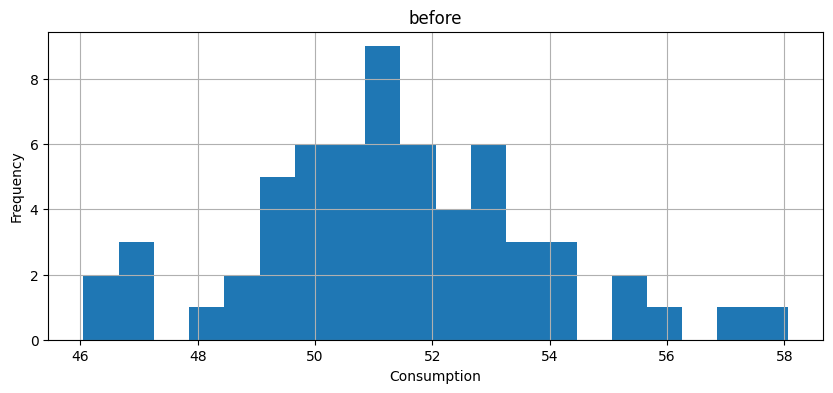

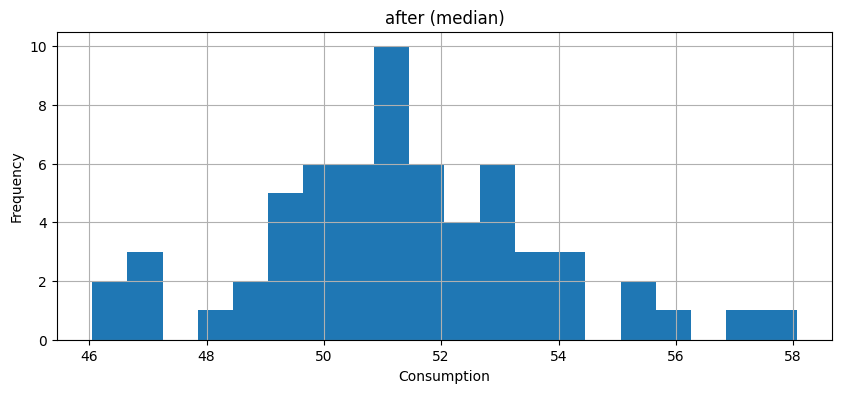

columns: 2


In [14]:
df = pd.read_csv("cleaned.csv", parse_dates=['dates'])
cleaned_df = clean_my_df(df)

In [15]:
df['month'] = df['dates'].dt.month
monthly_mean = df.groupby('month')['consumption'].mean()
display(monthly_mean)

,consumption
month,
1,50.514545
2,52.296897


In [16]:
df['dates'] = pd.to_datetime(df['dates'])
df.set_index('dates', inplace=True)
monthly_resample = df['consumption'].resample('M').mean()
display(monthly_resample.head())

/tmp/ipython-input-2947803044.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_resample = df['consumption'].resample('M').mean()


,consumption
dates,
2020-01-31,50.514545
2020-02-29,52.296897


In [17]:
bins = [0,45,55,999]
labels = ['low', 'medium', 'high']
df['cons_cat'] = pd.cut(df['consumption'], bins=bins, labels=labels)
display(df['cons_cat'].value_counts())

,count
cons_cat,
medium,57
high,5
low,0


In [18]:
agg_month = df.groupby(df.index.month).agg({'consumption': 'mean', 'temp': 'max'})
display(agg_month.head())

,consumption,temp
dates,,
1,50.514545,22.50
2,52.296897,23.31


In [19]:
df = pd.read_csv('cleaned_final.csv')
if 'dates' not in df.columns:
    raise KeyError ("not found")
df['dates'] = pd.to_datetime(df['dates'], errors='coerce')
df['month'] = df['dates'].dt.month
monthly_summary = df.groupby('month').agg(
    mean_cons=('consumption', 'mean'),
    sum_cons=('consumption', 'sum'),
    days_count=('consumption', 'count'),
).reset_index()
monthly_summary.to_csv('monthly_summary.csv', index=False)
print("saved result monthly_summary.csv")
display(monthly_summary)



saved result monthly_summary.csv


,month,mean_cons,sum_cons,days_count
0,1,50.523570,1566.230678,31
1,2,52.296897,1516.610000,29


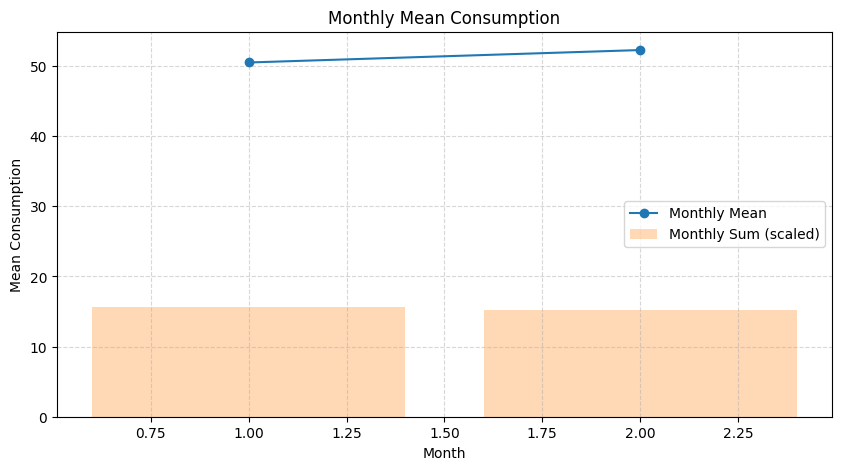

In [20]:
plt.figure(figsize=(10,5))
plt.plot(monthly_summary['month'],monthly_summary['mean_cons'], marker='o', linestyle='-', label='Monthly Mean', color='tab:blue')
plt.bar(monthly_summary['month'], monthly_summary['sum_cons']/100, alpha=0.3, label='Monthly Sum (scaled)', color='tab:orange')
plt.xlabel('Month')
plt.ylabel('Mean Consumption')
plt.legend()
plt.title('Monthly Mean Consumption')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

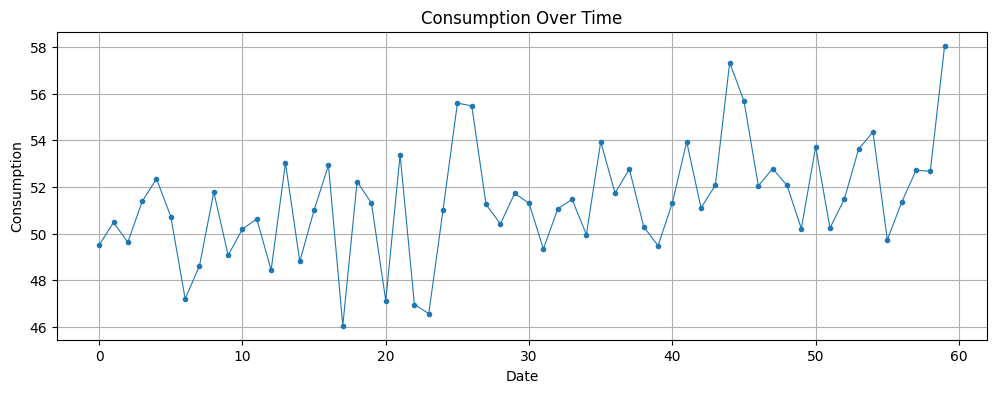

In [21]:
plt.figure(figsize=(12,4))
plt.plot(df.index, df['consumption'], marker='.', linewidth=0.8)
plt.title('Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.grid(True)
plt.show()

In [22]:
df = pd.read_csv('cleaned_final.csv', parse_dates=['dates'])
df.set_index('dates', inplace=True)
print(len(df))
display(df.head())

60


,consumption,temp
dates,,
2020-01-01,49.510000,19.64
2020-01-02,50.480000,19.91
2020-01-03,49.630000,20.28
2020-01-04,51.380678,20.88
2020-01-05,52.350000,18.84


/tmp/ipython-input-3143445060.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df['consumption'].resample('M').mean()


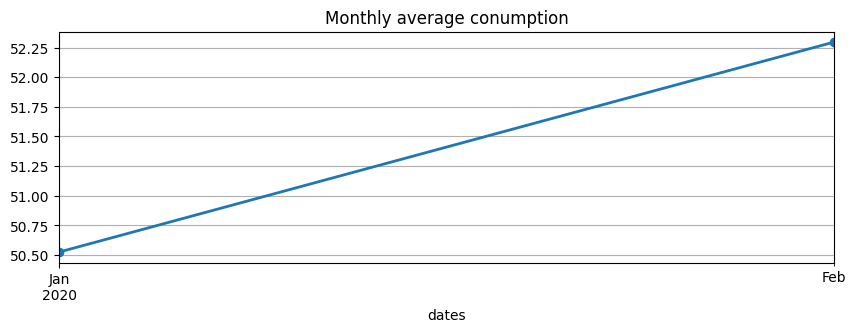

In [23]:
daily = df['consumption'].resample('D').mean()
monthly = df['consumption'].resample('M').mean()
plt.figure(figsize=(10,3))
monthly.plot(marker='o', linewidth=2)
plt.title('Monthly average conumption')
plt.grid(True)
plt.show()

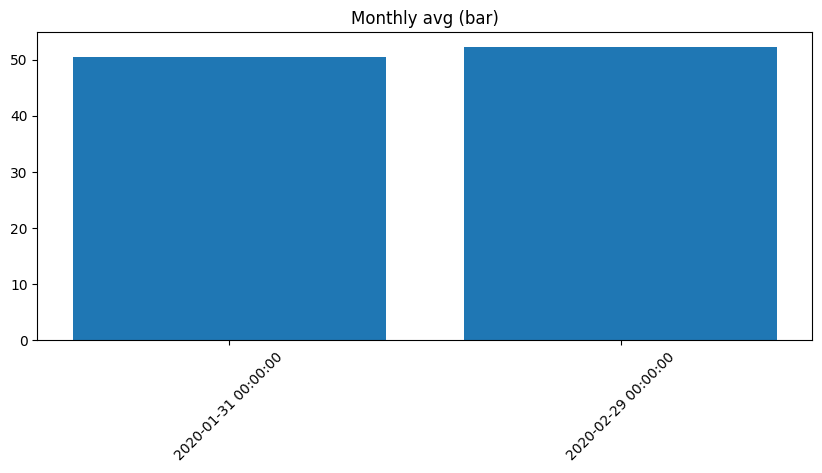

In [24]:
monthly_vals = monthly.values
labels = [str(m) for m in monthly.index]
plt.figure(figsize=(10,4))
plt.bar(labels, monthly_vals)
plt.xticks(rotation=45)
plt.title('Monthly avg (bar)')
plt.show()


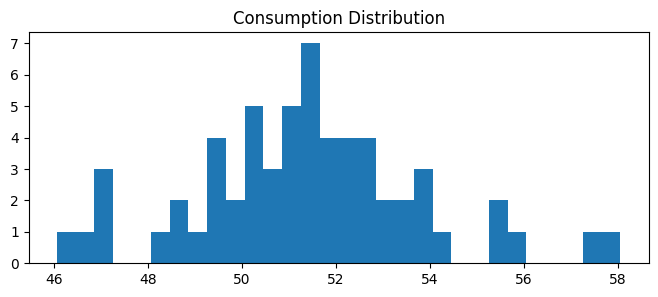

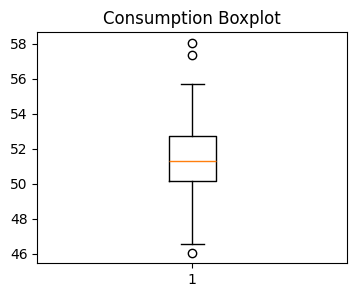

In [25]:
plt.figure(figsize=(8,3))
plt.hist(df['consumption'], bins=30)
plt.title('Consumption Distribution')
plt.figure(figsize=(4,3))
plt.boxplot(df['consumption'].dropna())
plt.title('Consumption Boxplot')
plt.show()

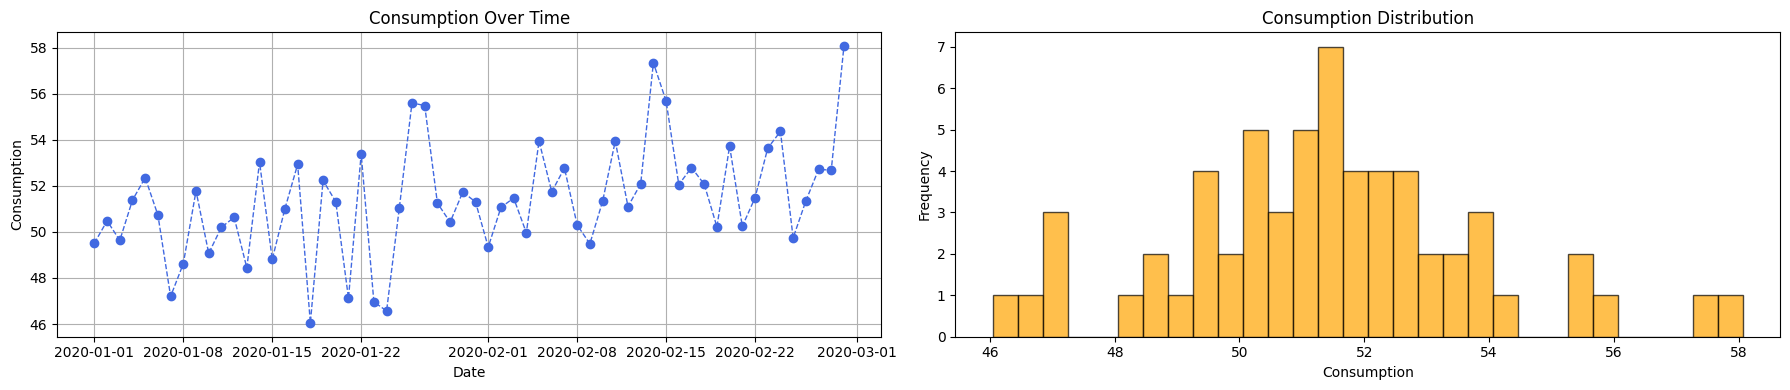

In [26]:
import matplotlib.pyplot as plt
df.reset_index(inplace=True)
fig, axes = plt.subplots(1, 2, figsize=(18,4))
axes[0].plot(
    df['dates'],
    df['consumption'],
    color='royalblue',
    linestyle='--',
    marker='o',
    linewidth=1,
)
axes[0].set_title('Consumption Over Time')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Consumption')
axes[0].grid(True)
axes[1].hist(
    df['consumption'],
    bins=30,
    color='orange',
    edgecolor='black',
    alpha=0.7,
)
axes[1].set_title('Consumption Distribution')
axes[1].set_xlabel('Consumption')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.savefig('monthly_plot.png', bbox_inches='tight')
plt.show()

In [27]:
df = pd.read_csv('cleaned_final.csv', parse_dates=['dates'])
df.set_index('dates', inplace=True)
display(df.describe())
print(df.isnull().sum())

,consumption,temp
count,60.000000,60.00000
mean,51.380678,21.07400
std,2.429081,1.00283
min,46.050000,18.84000
25%,50.140000,20.24500
50%,51.315000,21.18500
75%,52.725000,21.75000
max,58.060000,23.31000


consumption    0
temp           0
dtype: int64


In [28]:
monthly = df.resample('M').agg({
    'consumption':['mean', 'sum', 'count'],
    'temp':'mean'
})
monthly.columns = ['cons_mean', 'cons_sum', 'cons_count', 'temp_mean']
monthly.to_csv('monthly_summary.csv', index=True)
print("saved monthly_summary.csv")
display(monthly.head())

saved monthly_summary.csv


/tmp/ipython-input-3673574835.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample('M').agg({


,cons_mean,cons_sum,cons_count,temp_mean
dates,,,,
2020-01-31,50.523570,1566.230678,31,20.819677
2020-02-29,52.296897,1516.610000,29,21.345862


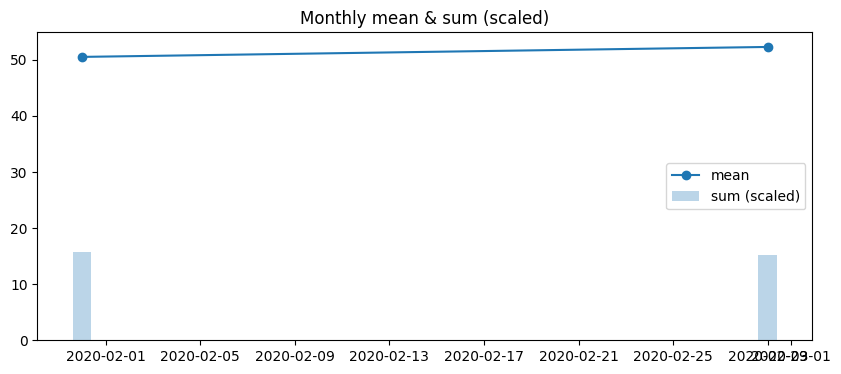

In [29]:
plt.figure(figsize=(10,4))
plt.plot(monthly.index, monthly['cons_mean'], marker='o', label='mean')
plt.bar(monthly.index, monthly['cons_sum']/100, alpha=0.3, label='sum (scaled)')
plt.legend()
plt.title('Monthly mean & sum (scaled)')
plt.show()

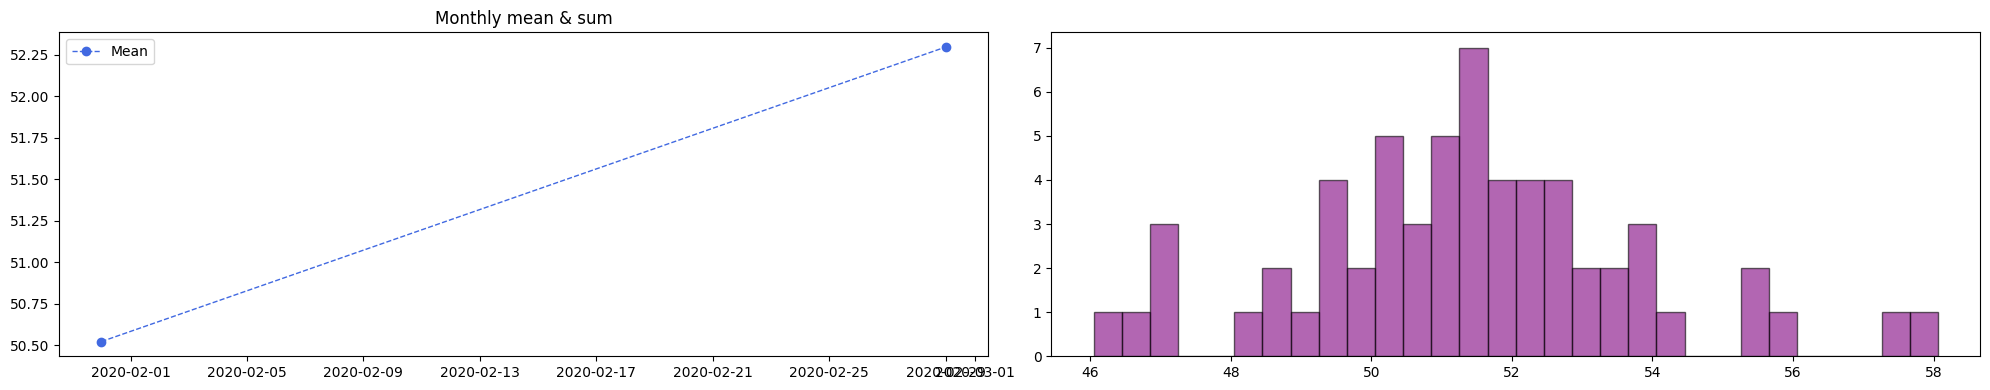

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(20,4))
axes[0].plot(monthly.index, monthly['cons_mean'], marker='o', color='royalblue', linestyle='--', linewidth=1, label='Mean')
axes[0].legend()
axes[0].set_title('Monthly mean & sum')
axes[1].hist(df['consumption'], bins=30, color='purple', alpha=0.6, edgecolor='black')
plt.tight_layout()
plt.savefig('monthly_plot.png', bbox_inches='tight')
plt.show()

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [32]:
df = pd.read_csv('cleaned_final.csv', parse_dates=['dates'])
df['dayofyear'] = df['dates'].dt.dayofyear
x = df[['dayofyear', 'temp']]
y = df['consumption']

In [34]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print("MSE:", mse)
print("R2:", r2)

MSE: 2.478256158878121
R2: 0.3285055398353818


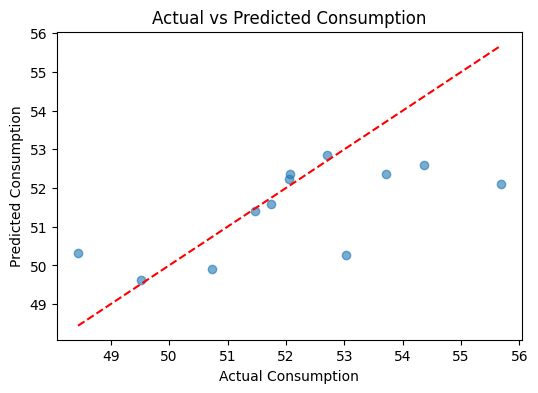

In [35]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.title('Actual vs Predicted Consumption')
plt.show()

In [36]:
joblib.dump(model, 'consumption_model.pkl')
print("saved consumption_model.joblib")

saved consumption_model.joblib


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [38]:
df['sin_day'] = np.sin(2*np.pi*df['dayofyear']/365)
df['cos_day'] = np.cos(2*np.pi*df['dayofyear']/365)
df['lag_1'] = df['consumption'].shift(1)
df['lag_2'] = df['consumption'].shift(2)
df['lag_3'] = df['consumption'].shift(3)
df = df.dropna()

In [41]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
pred_lin = lin_model.predict(x_test)
r2_lin = r2_score(y_test, pred_lin)
mse_lin = mean_squared_error(y_test, pred_lin)
print("Linear Regression:")
print("R2:", round(r2_lin, 4))
print("MSE:", round(mse_lin,4))

Linear Regression:
R2: 0.3285
MSE: 2.4783


In [42]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
pred_rf = rf_model.predict(x_test)
r2_rf = r2_score(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)
print("\nRandom Forest:")
print("R2:", round(r2_rf, 4))
print("MSE:", round(mse_rf, 4))


Random Forest:
R2: 0.614
MSE: 1.4246


In [44]:
print(f"Linear Regression:  R² = {r2_lin:.3f}, MSE = {mse_lin:.2f}")
print(f"Random Forest:      R² = {r2_rf:.3f}, MSE = {mse_rf:.2f}")


Linear Regression:  R² = 0.329, MSE = 2.48
Random Forest:      R² = 0.614, MSE = 1.42
